In [148]:
# linear regression
# y hat = theta0 + theta1x1 + ... + thetanxn
# vectorized form : y hat = parameter vector * feature vector

# to find theta vector that minimizes the cost (MSE)
# there is a closed form solution = The Normal Equation
# theta hat = (XTX)^-1 XT y
# theta hat is value that minimizes cost function
# y is vector of target values
# now we test this equation as follows

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# generated linear data

In [149]:
# now, compute theta hat using normal equation

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# the function we used to generate the data was
# y = 4 + 3x + gaussian noise
# so we would've hoped for theta0 to be 4 and theta1 to be 3, but close enough

array([[4.19638367],
       [2.75376528]])

In [150]:
# now can make predictions using theta hat

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

# pretty neat, the underworkings of linear regression

array([[4.19638367],
       [9.70391423]])

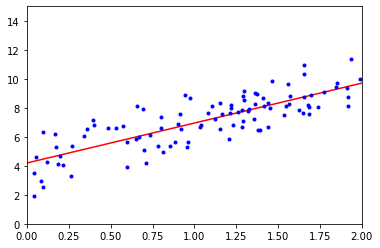

In [151]:
# now lets plot it

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [152]:
# now do simply with scikit

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# same as what we calculated above

(array([4.19638367]), array([[2.75376528]]))

In [153]:
lin_reg.predict(X_new)
# and same as prediction above

array([[4.19638367],
       [9.70391423]])

In [154]:
# the linear regression class is based on scipy.linalg.lstsq
# meaning least squares, can call directly

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

# same as two above
# this function actually computes
# theta hat = X^+y, where X^+ is the pseudoinverse of X
# (Moore-Penrose inverse). can use np.linalg.pinv() to compute 
# pseudoinverse directly

array([[4.19638367],
       [2.75376528]])

In [155]:
np.linalg.pinv(X_b).dot(y)

# the purpose of the pseudoinverse in linear algebra is to
# compute the best fit (least squares, eg linear regression) 
# solution to a system of linear equations that lacks a solution

# another use is to find the minimum euclidean norm solution
# to a system of linear equations with multiple solutions

# it is computed using standard matrix factorization technique
# called Singular Value Decomposition (SVD) that decomposes
# the training set X into matrix multiplication of three 
# matrices U, sigma, and V^T (np.linalg.svd())
# the pseudoinverse is computed as X^+ = V sigma^+ U^T

# to compute sigma^+, algo takes sigma and sets to zero all values
# smaller than a tiny threshold. after, it replaces all nonzero values with 
# their inverse and transposes the resulting matrix

# this computation is more efficient than the normal equation
# also, the normal equation may not work if XTX is not invertible,
# but the pseudoinverse is always defined

# normal equation complexity is between O(n^2.4) and O(n^3)
# while scikit svd is O(n^2)

array([[4.19638367],
       [2.75376528]])

In [156]:
# gradient descent is better suited method to train
# linear regression model when there are a large
# number of features or too many training instances to fit
# in memory

# move in direction of steepest descent by computing the gradient
# at the current point. when gradient is 0, ou have found minimum

# start parameter vector with random values and improve gradually taking one
# step at a time, attempting to decrease the cost function until
# algorithm converges at minimum

# important hyperparameter is learning rate. if too small, it will take 
# too many steps. if too large, it could oscillate and could diverge

# if cost function is not bowl shape, could converge to local min
# rather than global optimal min

# mse is convex function, meaning pick any two points across
# the curve and line connecting them never crosses the curve
# meaning no local minima, just global minimum
# it also is continuous (can take a derivative) and never
# changes slope abruptly

# when using gradient descent, make sure all features have similar scale
# ie use standard scaler

# training is more difficult for this in higher dimensions; thankfully for linear regression
# the solution is simply at the bottom of the bowl (cause convex function)



In [157]:
# batch gradient descent
# takes partial derivative of cost function with respect to each

# partial derivative of cost function = 
# 2/m * sum(parameter .dot features - labels)*feature

# parameter thetaj
# to determine, take partials and move in opposite direction of slope
# times the learning rate to get step size
# theta step = theta - rate * gradient(mse)

eta = .1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta
# and is exactly what every other method found
# to find a good learning rate, can use grid search from chapter 2
# to find iterations, set to large number and break when gradient
# vector becomes tiny, smaller than tolerance


array([[4.19638367],
       [2.75376528]])

In [158]:
# stochastic gradient descent is good when the training
# data is huge; but because of random nature, can
# oscillate when close to the minimum
# because of this, it probably won't find global min

# it also looks at one piece of data at a time and computes gradient
# rather than batch of whole training data as in bgd

# this means the training step is much faster but more random(stochastic)

# when cost function is irregular, sgd can actually help algorithm jump out
# of local minima, so sgd has better chance of finding global minimum than bgd

# randomness is good because can help us escape local minima, but bad because
# algorithm will never settle at global minimum
# can fix this by gradually reducing the learning rate with a learning schedule

# implementation of stochastic gradient descent with simple learning schedule

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random 2x1

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta


array([[4.09112173],
       [2.80638026]])

In [159]:
# can also do sgdregressor from sklearn
# params for below example as follows
# max 1000 epochs, or until loss drops by less than .001 (tolerance)
# learning rate starts at .1 and follows a default learning schedule
# does no regularization (penalty = none)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = .1)
sgd_reg.fit(X, y.ravel())

# will again find solution close to one returned by normal equation

sgd_reg.intercept_, sgd_reg.coef_

(array([4.13081318]), array([2.79338524]))

In [160]:
# mini batch gradient descent looks at subsets of training data
# can take advantage of hardware optimization of matrix operations on gpus

# progress in parameter space is less erratic than sgd, will walk closer around
# the global min than sgd but may be harder to escape the local minima (when problems
# suffer this issue, unlike linear regression :)

In [161]:
# now, onto Polynomial Regression

# can use linear model to fit nonlinear data
# add powers of each feature as new feature
# then train linear model on this extended set of features

# generate nonlinear data based on quadratic equation

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X**2 + X + 2 + np.random.randn(m, 1)
# made some cool vectors

In [162]:
# so, a line will never fit this data.
# we can use scikits polynomial features class to transform 
# our training data, adding the square of each feature in the training
# set as a new feature

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.35131908])

In [163]:
X_poly[0]

# X_poly contains the original feature of X plus the square of this feature

array([-2.35131908,  5.52870143])

In [164]:
# now, we can fit a linear regression model to this extended training data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# compare this to intercept = 2, x^2 = .5, x = 1

# when there are multiple features, polynomial regression
# can find relationships between features, which linear regression
# cannot. this is because PolynomialFeatures adds all combinations
# of features up to the given degree

# ex if degree = 3 and there are features a and b, polynomial adds
# a^2, a^3, b^2, b^3 and ab, a^2b, ab^2
# this can cause a combinatorial explosion, be careful# so, a line will never fit this data.
# we can use scikits polynomial features class to transform 
# our training data, adding the square of each feature in the training
# set as a new feature

(array([2.26037694]), array([[1.02040147, 0.43869951]]))

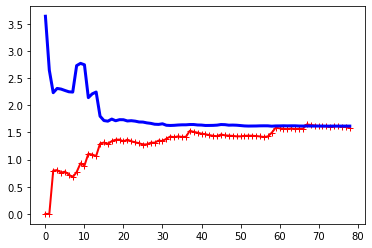

In [165]:
# if you perform high degree poly regression,
# will likely fit the training model better than with
# plain linear regression

# the problem we see here is the polynomial regression
# will overfit training data, linear regression will
# underfit training data

# we looked at k fold cross validation before.
# a good way to analyze for regression models
# is looking at the learning curves. This plots 
# the model's performance on training and validation sets
# as a function of the training set size

# so we will train model several times on different sized subsets
# of data of training set.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# so this model is underfitting, which makes sense cause
# data was not linear to begin with. we see high validation error
# when training few examples because it cannot generalize well off of only 
# a few training examples. When learning more examples, val error slowly goes down 
# until it hits a plateau 

# with the train error, it is easy to correctly classify the first few training examples
# but after a while, we see that a line does not fit nonlinear data well. it also plateaus
# and meets around the same place as the validation error

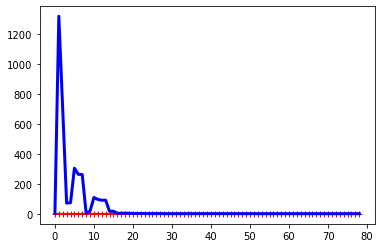

In [166]:
# now learning curves of 10th degree polynomial model (expecting overfitting)

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# as we can see, error on training data is much lower here
# than in regular linear regression
# there is also a gap between the curves, meaning model
# performs much better on training data than validation data
# hallmark of overfitting model
# but, when training set gets larger curves get much closer

# and as we can see, one way to fix an overfitting model is
# to feed it more training data until validation error meets
# training error

In [167]:
# bias/variance tradeoff
# error of model can be described as sum of 3 different types of errors

# bias : generalization error is due to wrong assumptions. assuming data is linear
# when it is actually quadratic. high bias model is most likely to underfit training data

# variance : due to model's excessive sensitivity to small variations in training data
# a model with many degrees of freedom (high degree polynomial model) is likely to have
# high variance and thus overfit training data

# irreducible error : noisiness of data. reduce by cleaning data, fix data sources
# detect or remove outliers

# increasing a model's complexity typically increases its variance and reduces its bias
# reducing a models complexity increases its bias and reduces its variance

# this is why it is a tradeoff :)


In [168]:
# Regularized Linear Models

# the fewer degrees of freedom a model has, thre harder it will
# be to overfit the data

# regularize polynomial model by reducing number of polynomial degrees

# for linear model, regularization is achieved by constraining weights of the model

# Ridge Regression, Lasso Regression, and Elastic Net are 3 different ways to constrain the weights

In [169]:
# Ridge Regression

# for the mse, it adds a regularization term theta^2
# this insures that the weights are as small as possible
# if w is feature weights, theta is 1/2(magn(w)_2)^2, where magn(w)_2
# is the l2 norm of the weight vector
# for gradient descent, just add alpha * weight vector to mse gradient vector

# l1 norm is sum of absolute values of vector
# l2 norm is square root of sum of squares (magnitude)

# closed form solution for Ridge Regression, A is identity matrix with 0 in top
# left cell for bias term

# theta hat = (X^TX + alpha*A)^-1 * X^T * y

# now using scikit, will use closed form solution that
# uses Cholesky matrix factorization technique

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[5.08065386]])

In [170]:
# also with sgd

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
# specifying penalty in sgd tells scikit you want to add
# l2 norm, 1/2 magnitude of weight vector; same as ridge regression above

array([5.04369398])

In [171]:
# Lasso Regression

# least absolute shrinkage and selection operator regression

# adds regularization term equal to l1 norm, so is different
# from ridge regression
# it automatically selects features and outputs a sparse matrix
# because it tends to eliminate weights of the least important features

# note lasso cost is not differentiable at any theta = 0, but gd 
# still works fine if you use a subgradient vector instead when any
# theta = 0

# subgradient (g) = gradient(MSE) + alpha * (sign vector)

# scikit, or could do sgd with penalty = l1

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = .1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.03539807])

In [172]:
# Elastic Net is middle ground between two,
# regularization term is mix of both l1 and l2,
# and you control ratio r
# if r = 0, it is ridge regression. if r = 1, it is lasso

# when to use each of these? You should always have some
# regularization, so it is preferable to avoid plain 
# linear regression
# Ridge is a good default, but if you see that only a few
# features are important, you should prefer Lasso or Elastic
# because they reduce the useless features' weights down to zero

# in general, elastic is preferred over Lasso because Lasso may behave erratically
# when number of features is greater than number of training instances or when
# several features are strongly correlated

# scikit elastic net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = .1, l1_ratio = .5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.03633024])

In [173]:
# Early Stopping

# you could also stop iterative learning algorithms when the
# validation error reaches a minimum. The val error will be
# at a minimum, then it will start to go up again, meaning
# the model is beginning to overfit the training data

# or can stop when validation error has been above min for some
# time and roll back to previous model where val error was at min

# implementation

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)


poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, 
                       penalty = None, learning_rate = 'constant', eta0 = .0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) #continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
# when warm start = True, it continues training from where
# it left off rather than training from scratch

In [174]:
# Logistic Regression

# commonly used to estimate probability that instance belongs
# to a particular class. binary classifier would be like
# greater than 50 predict 1, less than 50 predict 0

# takes input features and computes weighted sum of them, 
# plus bias term (just like linear regression), and outputs the
# logistic of this result

# logistic is a sigmoid function that outputs a number between
# 0 and 1

# sigma(t) = 1 / (1 + exp(-t))

# once model has estimated probability that x belongs to positive class,
# can make its prediction y hat easily

# training objective is to assign high probs to positive instances
# and low probs to negative instances

# cost function
# c(theta) = -log(p hat) , if y = 1
# -log(1 - p hat), if y = 0

# this is the cost for one example, but can be rewritten over whole
# training set as log loss

# bad news is there is no known closed form solution for this
# but the function is convex, so gradient descent (or other optimization algorithm)
# is guaranteed to find global minimum

# partial derivative of cost function with regard to jth model param theta_j is
# 1/m * sum(sigmoid(theta^T*x^i) - y^i)x^i_j
# computes prediction error and multiplies by jth feature value and averages all of them together
# once you compute this vector, use it in batch gradient descent
# this is for batch. for stochastic, just do one at a time. for mini-batch, use a minibatch at a time



In [175]:
# we will demonstrate logistic regression with iris dataset

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [176]:
# first, we will try to determine simply from petal width
# if the flower is iris virginica

X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if iris virginica, else 0

In [177]:
# now train model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

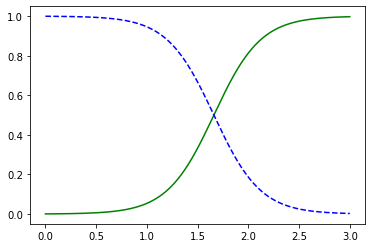

In [178]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label = "Not Iris virginica")
# clear decision boundary at 1.6. 
# x axis is petal length, y axis is probability
# blue is not virginica, green is virginica

In [179]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [180]:
# just like other linear models, logr can
# be regularized with l1 or l2 norm. scikit
# uses l2 for logr by default

# Softmax Regression
# this is logr with support for multiple classes
# without having to train and combine multiple binary
# classifiers
# also called multinomial logistic regression

# given instance x, softmax regression model first
# computes a score s_k(x) for each class k, then estimates
# the probability of each class by applying the softmax function (or normalized exponential)
# score function is just like linear regression prediction

# s_k(x) = x^T * theta^k
# each class has own dedicated param vector theta^k
# all these are typically stored in a parameter matrix

# after computing the score for every class for the instance x
# , estimate probability p hat _ k with softmax function

# function computes exponential of every score, then normalizes them (divide by sum of all exponentials)
# scores are generally called logits or log-odds

# p hat_k = sigmoid(score(x)_k) = exp(score(x)) / sum j = 1 to k (score_j(x))
# k is number of classes, s(x) is vector containing scores of each class for instance x
# sigmoid function is estimated probability that instance x belongs to class k, given
# the scores of each class for that instance

# so classifier just predicts class with highest estimated probability
# y hat = argmax_k(sigmoid(score(x))) = argmax_k(score_k(x)) = argmax_k((param vector k)^T*x)
# argmax returns value of variable that maximizes a function, so in this case is k that
# maximizes estimated probability of sigmoid function

# softmax regression is multiclass, not multioutput. use is for mutually
# exclusive classes like different types of plants, not to
# recognize multiple people in a picture

# training objective is to have a model that estimate a high probability
# for the target class, and low probability for the other classes
# minimizing the cost function (cross entropy) should lead to this objective
# because it penalizes the model when it estimates low probability for a target class
# cross entropy is frequently used to measure how well a set of estimated class probabilities
# matches the target classes

# cross entropy = -1/m sum 1 to m (sum 1 to k (y_k^(i) * log(p hat _k ^ (i))))
# y_k^(i) is target probability that ith instance belongs to class k. in general,
# is either 1 or 0, depending upon whether instance belongs to class or not

# when there are 2 classes, this function is simply equal to logistic 
# regression's cost function

# the gradient for cross entropy is given as follows
# = 1/m sum 1 to m (p hat_k^(i) - y_k^(i))x^(i)

# now we can compute gradient vector for every class then use gradient descent (or
# other optimization algorithm) to find parameter matrix that minimizes the cost function

# now, use softmax regression to classify iris flowers into all three classes

# scikit learn uses one versus rest by default when you train it on more than
# two classes, but can set multi_class hyperparameter to multinomial to switch
# to softmax regression
# must also specify a solver that supports softmax regression, such as lbfgs
# it applies l2 regularizer by default, which you can control with hyperparameter C

X = iris['data'][:, (2, 3)] # use petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [181]:
softmax_reg.predict([[5, 2]]) # 5 cm long, 2 cm wide

array([2])

In [182]:
softmax_reg.predict_proba([[5, 2]])
# third option has highest probability, and that's what it gave us above

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])